Step 1: Load and Inspect Data

In [1]:
import pandas as pd
df = pd.read_csv("S:/Data Analysis Projects/NYC-Airbnb-Open-Data-Analysis/data/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Step 2: Clean Data

In [5]:
# Check nulls
print(df.isnull().sum())

# Drop rows with missing names or host names
df = df.dropna(subset=['name', 'host_name'])

# Remove extreme prices
df = df[df['price'] < 1000]

# Reset index
df.reset_index(drop=True, inplace=True)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Step 3: Exploratory Data Analysis (EDA)

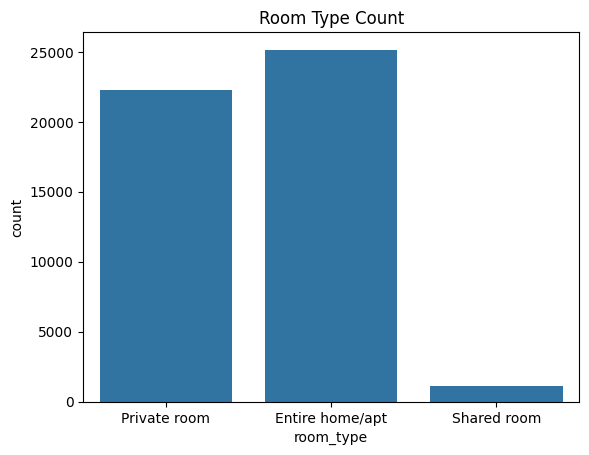

In [9]:
# Room type distribution:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='room_type')
plt.title("Room Type Count")
plt.show()

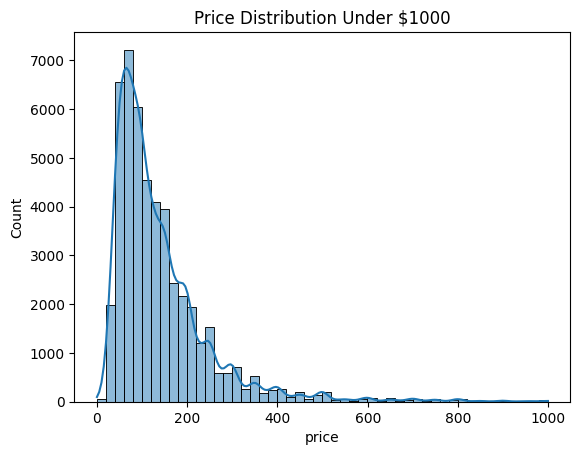

In [11]:
# Price distribution:

sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution Under $1000")
plt.show()

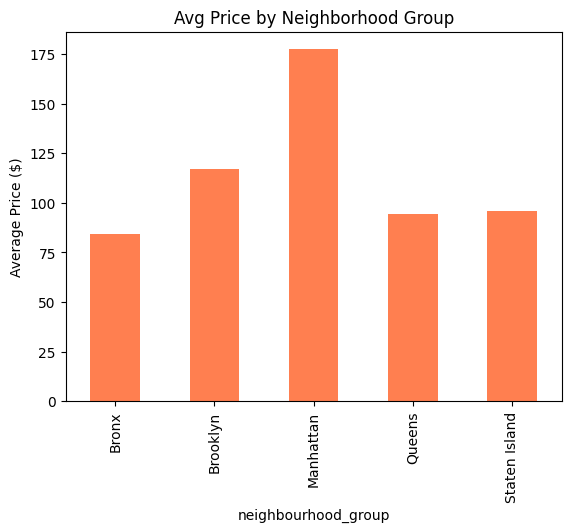

In [13]:
# Average price by neighborhood group:

df.groupby('neighbourhood_group')['price'].mean().plot(kind='bar', color='coral')
plt.title("Avg Price by Neighborhood Group")
plt.ylabel("Average Price ($)")
plt.show()

Step 4: Geo-Visualization Using Folium

In [16]:
import folium
from folium.plugins import MarkerCluster

nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
marker_cluster = MarkerCluster().add_to(nyc_map)

for _, row in df.sample(1000).iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['name']} (${row['price']})",
        icon=folium.Icon(color='blue', icon='home')
    ).add_to(marker_cluster)

nyc_map.save("nyc_airbnb_map.html")

Step 5: Bonus Insights

In [19]:
# Host with most listings:

top_hosts = df['host_id'].value_counts().head(10)
print(top_hosts)

host_id
219517861    327
107434423    232
30283594     119
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64


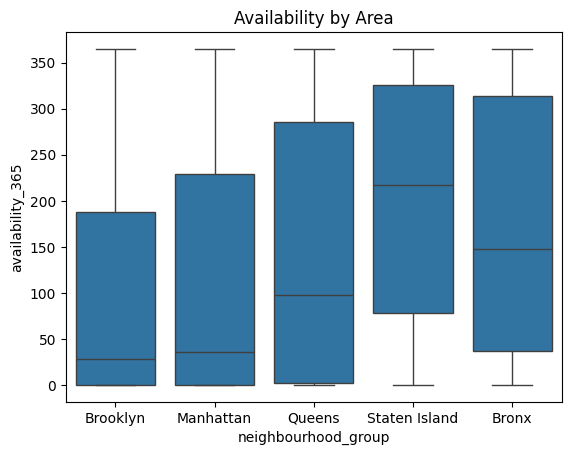

In [21]:
# Availability boxplot:

sns.boxplot(data=df, x='neighbourhood_group', y='availability_365')
plt.title("Availability by Area")
plt.show()

Key Insights:

1- Manhattan listings have the highest average price, followed by Brooklyn.

2- Private rooms dominate the listings, but entire homes are significantly pricier.

3- A few hosts control hundreds of listings, indicating business-scale rentals.

4- Most listings are priced under 300, with a spike around 100.

5- The availability varies widely by location — some areas have very seasonal listings.

6- Geo-map reveals dense clusters of listings in Manhattan, Brooklyn, and Queens.